# The JuSiPy project

In [1]:
import jusipy
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

## Tools and Data

### Land Deals

jusipy provides interfaces for two Land Deal datasets:
* Land Matrix : `jusipy.deals.LandMatrix`
  * The Lat/Long points are provided, now
* GRAIN
  * 2016 : `jusipy.deals.GRAIN`
  * 2012 : `jusipy.deals.GRAIN_OLD`

In [6]:
LM  = jusipy.deals.LandMatrix() # LandMatrix
GR  = jusipy.deals.GRAIN()      # GRAIN 2016
#GR2 = jusipy.deals.GRAIN_OLD()  # GRAIN 2012??

Loading LandMatrix                    

These datasets have a uniform interface. Access the raw matrix with `LM.M`.

In [3]:
LM.M[:5]

,deal_id,target_country,location,investor_name,investor_country,intention,negotiation_status,implementation_status,intended_size,contract_size,...,contract_farming,crop,negotiation_year,negotiation_agreement,implementation_year,implementation_agreement,target_country_iso3,investor_country_iso3,lat,long
0,3,Myanmar,"Rakhine, Myanmar",Andhra Pradesh Industrial Infrastructure Corpo...,[India],Food crops,Intended,Project not started,20234.0,NaN,...,NaN,"Onion, Tea, Corn (Maize), Rice, Soya Beans, Su...",2007.0,Expression of interest,NaN,None,MMR,[IND],19.8101,93.987843
1,4,Bangladesh,"Noakhali, Bangladesh",Individual entrepreneurs from Bangladesh,[Bangladesh],Livestock,Concluded,Project not started,5000.0,NaN,...,NaN,NaN,2003.0,Oral Agreement,2003.0,None,BGD,[BGD],22.8724,91.097318
2,11,Cambodia,"Ratanakiri Province, Cambodia",30/4 Gialani Company Limited,[Viet Nam],"Agriunspecified, Industry, Livestock",Concluded,None,NaN,9380.0,...,NaN,NaN,2005.0,Contract signed,NaN,None,KHM,[VNM],13.8577,107.101193
3,12,Cambodia,"Kratié, Cambodia",China Asean Resources Ltd.,"[China, Hong Kong Special Administrative Region]","For wood and fibre, Non-food agricultural comm...",Concluded,In operation,NaN,7000.0,...,NaN,"Accacia, Rubber",2008.0,Contract signed,2011.0,production,KHM,"[CHN, HKG]",12.4897,106.028751
4,13,Cambodia,"Mondol Kiri, Cambodia",Agro Forestry Research,[China],Non-food agricultural commodities,Concluded,None,NaN,7000.0,...,NaN,"Accacia, Rubber",2009.0,Contract signed,NaN,None,KHM,[CHN],12.7879,107.101193


### GIS tools

The GIS submodule provides
* Country Code Conversions : `jusipy.GIS.CountryCode`
* Geocoding lookups:
  * MapQuest : `jusipy.GIS.Geocode`
  * Google : `jusipy.GIS.GoogleCode`
* Utilities:
  * `jusipy.GIS.projection`: Project a square matrix onto the (-90,90),(-180,180) coordinate system
  * `jusipy.GIS.sample`: Randomly sample from the unit sphere, or from the (-90,90),(-180,180) coordinate system

In [5]:
# The CountryCode utility allows you to convert between name, ISO2, ISO3 and numeric codes for countries.
# to resolve ambiguities, it attempts to resolve differences by allowing for mistakes /changes in the country names

CC = jusipy.GIS.CountryCode()
CC['Germany']

countrycode(country='Germany', iso2='DE', iso3='DEU', number=276)

In [6]:
# The GeoCoding libraries often have a limit on what we can use, so we can cache them in firebase dictionary
# This is implemented in the utils.FireDict object

gc = jusipy.GIS.GoogleCode(cache=jusipy.utils.FireDict(sub='googlecode'))  # Google GeoCode
#gc = jusipy.GIS.Geocode(cache=jusipy.utils.FireDict(sub='geocode'))    # openStreetMap GeoCode

# The geocoding tools provide the .address and .latlong functions:
print('Latitude and longitude', gc.address('Dragabergveien 46, 4085 Hundvaag, Norway'))
print('Address', gc.latlong(58.99057309999999, 5.7484604))

Latitude and longitude [58.99057309999999, 5.7484604]
Address Dragabergveien 46, 4085 Hundvåg, Norway


#### Sample random points on earth that are ONLY on land

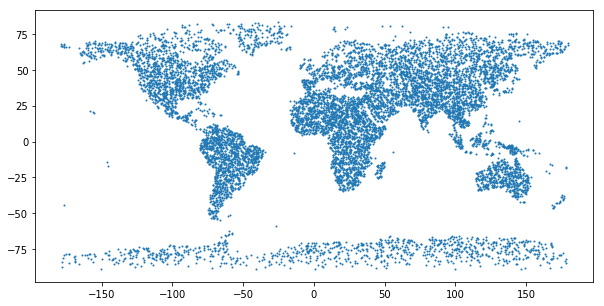

In [10]:
import jusipy
import matplotlib.pylab as plt

# This takes a LOOOONG time...
#GLCF = jusipy.latlong_features.GLCF(resolution='8km')

plt.figure(figsize=(10,5))
lat, long = list(zip(*jusipy.GIS.sample.random_latlong(land=True, 
                                                       glcf=GLCF, 
                                                       size=10000)))
plt.scatter(long, lat, s=1)

## Features

### Lat/Long-based features: `jusipy.latlong_features`

Several datasets describe features at the latitude/longitude level:
* `jusipy.latlong_features.NaturalEarth`:
    * Distance to nearest:
        * port
        * airport
        * road
        * urban area
        * railroad
* LandCover datasets
    * `jusipy.latlong_features.GLCF` AVHRR (at different resolutions):
        * 1deg
        * 8km
        * 1km
    * `jusipy.latlong_features.USGS`: (Not completely implemented!!)
      * MODIS
    
    
These can be accessed altogether using the **`jusipy.latlong_features.All()`** function, which returns a class with a common `get` function.

In [1]:
import jusipy

all_latlong_features = jusipy.latlong_features.All()

points = jusipy.GIS.sample.random_latlong(land=True, size=10)

all_latlong_features.get(points, pixel_window=10)

Loading GLCF(1deg)                    ann/repos/JuSiPy_Asser/jusipy/latlong_features/data/natural_earth/ne_10m_urban_areas)                    

,nearest_airport,nearest_port,nearest_roads,nearest_railroad,nearest_urban_area,Water,Evergreen Needleleaf Forest,Evergreen Broadleaf Forest,Deciduous Needleleaf Forest,Deciduous Broadleaf Forest,...,Deciduous Broadleaf Forest2,Mixed Forest2,Woodland2,Wooded Grassland2,Closed Shrubland2,Open Shrubland2,Grassland2,Cropland2,Bare Ground2,Urban and Built2
0,4.767734,6.239258,1.021472,4.137231,0.996369,0.208617,0.000000,0.006803,0.000000,0.000000,...,0.106576,0.07483,0.000000,0.015873,0.000000,0.004535,0.031746,0.199546,0.011338,0.000000
1,3.433197,3.424461,0.279241,0.467451,2.947061,0.199546,0.024943,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.011338,0.000000,0.988662,0.000000
2,2.766891,9.896986,0.259135,4.343989,2.652356,0.126984,0.294785,0.000000,0.000000,0.000000,...,0.045351,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,67.477393,65.892456,65.557474,75.898354,67.492327,0.124717,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.857143,0.142857,0.000000,0.000000,0.000000,0.000000
4,52.149532,49.160022,51.880271,66.027371,54.038385,0.705215,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.287982,0.006803,0.000000,0.000000,0.000000,0.201814,0.000000,0.000000
5,67.294606,67.310231,67.322449,67.298259,67.247113,0.000000,0.000000,0.154195,0.000000,0.000000,...,0.009070,0.00000,0.000000,0.000000,0.000000,0.000000,0.199546,0.775510,0.000000,0.000000
6,2.985524,0.708813,0.067242,0.376715,0.324082,0.174603,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.544218,0.015873,0.000000,0.439909,0.000000
7,3.107996,3.074138,0.178627,0.052416,0.804014,0.029478,0.000000,0.070295,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.126984,0.122449,0.029478,0.721088,0.000000
8,13.846223,12.942988,12.928230,13.990951,14.095693,0.013605,0.015873,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.006803,0.000000,0.031746,0.340136,0.612245,0.000000,0.009070,0.000000
9,84.917359,84.597236,84.583899,84.593995,84.588144,0.312925,0.000000,0.222222,0.004535,0.437642,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.825397


Given a dataFrame with the following columns:
 * lat
 * long

There is a wrapper function that produces a dataframe which keeps the index of the dataframe: **`jusipy.latlong_features.get()`**

In [3]:
import pandas as pd
jusipy.latlong_features.get(pd.DataFrame(points, columns=['lat', 'long']), all_latlong_features)

,nearest_airport,nearest_port,nearest_roads,nearest_railroad,nearest_urban_area,Water,Evergreen Needleleaf Forest,Evergreen Broadleaf Forest,Deciduous Needleleaf Forest,Deciduous Broadleaf Forest,...,Deciduous Broadleaf Forest2,Mixed Forest2,Woodland2,Wooded Grassland2,Closed Shrubland2,Open Shrubland2,Grassland2,Cropland2,Bare Ground2,Urban and Built2
index,,,,,,,,,,,,,,,,,,,,,
0,4.767734,6.239258,1.021472,4.137231,0.996369,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.433197,3.424461,0.279241,0.467451,2.947061,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.766891,9.896986,0.259135,4.343989,2.652356,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,67.477393,65.892456,65.557474,75.898354,67.492327,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,52.149532,49.160022,51.880271,66.027371,54.038385,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,67.294606,67.310231,67.322449,67.298259,67.247113,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,2.985524,0.708813,0.067242,0.376715,0.324082,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,3.107996,3.074138,0.178627,0.052416,0.804014,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,13.846223,12.942988,12.928230,13.990951,14.095693,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Country level features

Country level features have specific functionality that allow us to retrieve data for a specific year, but also allow a 'fuzzy' lookup - if data isn't available for a specific year, look in the past and in the future for a close-matching measure.

Several country-level datasets are impemented (retrieved from the LandPortal, or the World Bank).

 * Percentage of indigenous and Communal lands : `jusipy.country_features.LMM_PICL()`
 * Legal Security of Indigenous and Community Lands : `jusipy.country_features.LMM_LSIC()`
 * Corruption Percention Index : `jusipy.country_features.TI_CPI()`
 * Agricultural and Rural Development : `jusipy.country_features.WB_ARD()`
 * Social Protection and Labor indicators : `jusipy.country_features.WB_SPL()`
 * Social Development indicators : `jusipy.country_features.WB_SD()`
 * Land Governance and Assessment Framework : `jusipy.country_features.WB_LGAF()`
 * Socio-Economic Indicators : `jusipy.country_features.WB_SE()` 
 * Land and Gender Indicators : `jusipy.country_features.WB_LG()`

They are provided in a uniform interface.

These can be accessed altogether using the **`jusipy.country_features.All()`** function, which returns a class with a common `get` function.

A description of the features can be found in the `description` property.

In [4]:
# Country-level features
import jusipy

#LMM_PICL = jusipy.country_features.LMM_PICL() # Percentage of indigenous and Communal lands
#LMM_LISC = jusipy.country_features.LMM_LSIC() # Legal Security of Indigenous and Community Lands
#TI_CPI   = jusipy.country_features.TI_CPI()   # Corruption Percention Index
#WB_ARD   = jusipy.country_features.WB_ARD()   # Agricultural and Rural Development
#WB_SPL   = jusipy.country_features.WB_SPL()   # Social Protection and Labor indicators
#WB_SD    = jusipy.country_features.WB_SD()    # Social Development indicators
#WB_LGAF  = jusipy.country_features.WB_LGAF()  # Land Governance and Assessment Framework
#WB_SE    = jusipy.country_features.WB_SE()    # Socio-Economic Indicators
#WB_LG    = jusipy.country_features.WB_LG()    # Land and Gender Indicators
#
#A = jusipy.country_features.All([LMM_PICL, LMM_LISC, TI_CPI, WB_ARD, WB_SPL, WB_SD, WB_LGAF, WB_SE, WB_LG])
A_country = jusipy.country_features.All() # Equivalent to the above

Loading WorldBank(/Users/thiesgehrmann/repos/JuSiPy_Asser/jusipy/country_features/data/SD_API_15_DS2_en_csv_v2_10186395.csv)                     

You can query these datasets with the `get` function, which allows you to ask for the newest available data for each indicator:

In [14]:
#A.get('DEU', year='newest') # Equivalent to ->
A_country.get('DEU')

,WB_LGAF__WB_LGAF2016_1_1_1,WB_LGAF__WB_LGAF2016_1_1_2,WB_LGAF__WB_LGAF2016_1_1_3,WB_LGAF__WB_LGAF2016_1_1_4,WB_LGAF__WB_LGAF2016_1_2_1,WB_LGAF__WB_LGAF2016_1_2_2,WB_LGAF__WB_LGAF2016_1_2_3,WB_LGAF__WB_LGAF2016_1_2_4,WB_LGAF__WB_LGAF2016_1_2_5,WB_LGAF__WB_LGAF2016_1_2_6,...,WB_SD__SL_TLF_ACTI_ZS,WB_SD__SL_TLF_CACT_FE_ZS,WB_SD__SL_TLF_CACT_MA_ZS,WB_SD__SL_UEM_TOTL_FE_ZS,WB_SD__SL_UEM_TOTL_MA_ZS,WB_SD__SM_POP_REFG,WB_SD__SM_POP_REFG_OR,WB_SD__SP_ADO_TFRT,WB_SD__SP_DYN_LE00_FE_IN,WB_SD__SP_DYN_LE00_MA_IN
0,None,None,None,None,None,None,None,None,None,None,...,78.087997,55.027,66.167999,3.316,4.127,970302.0,66.0,6.8406,83.1,78.3


You can also query for multiple countries

In [19]:
TI_CPI.get(['DEU', 'GRC'])

[CountryFeatures(TI_CPI_CPIRN=12.0, TI_CPI_CPIRO=14.0, TI_CPI_CPISN=81.0, TI_CPI_CPISO=8.04614),
 CountryFeatures(TI_CPI_CPIRN=59.0, TI_CPI_CPIRO=80.0, TI_CPI_CPISN=48.0, TI_CPI_CPISO=3.3889699999999996)]

You can also specify a year with the `years=` argument

In [20]:
# TI_CPI.get(['DEU', 'GRC'], years=[2017, 2017]) # Is equivalent to ->
TI_CPI.get(['DEU', 'GRC'], years=2017)

[CountryFeatures(TI_CPI_CPIRN=12.0, TI_CPI_CPIRO=None, TI_CPI_CPISN=81.0, TI_CPI_CPISO=None),
 CountryFeatures(TI_CPI_CPIRN=59.0, TI_CPI_CPIRO=None, TI_CPI_CPISN=48.0, TI_CPI_CPISO=None)]

If there is no data available for a specific year, you can specify the number of years we should search around with the `fuzzy=` argument

In [21]:
TI_CPI.get(['DEU', 'GRC'], years=2017, fuzzy=5)

[CountryFeatures(TI_CPI_CPIRN=12.0, TI_CPI_CPIRO=None, TI_CPI_CPISN=81.0, TI_CPI_CPISO=None),
 CountryFeatures(TI_CPI_CPIRN=59.0, TI_CPI_CPIRO=None, TI_CPI_CPISN=48.0, TI_CPI_CPISO=None)]

You can also get a dataFrame as a result:

In [22]:
TI_CPI.get(['DEU', 'GRC'], years=2017, fuzzy=10, df=True)

,TI_CPI_CPIRN,TI_CPI_CPIRO,TI_CPI_CPISN,TI_CPI_CPISO
0,12.0,14.0,81.0,8.04614
1,59.0,80.0,48.0,3.38897


Descriptions for the features can be accessed with the `F.description` property.

In [24]:
TI_CPI.description

{'TI_CPI_CPIRN': 'Corruption Perception Index - Country Ranking (New Methodology, from 2012 onwards)',
 'TI_CPI_CPIRO': 'Corruption Perception Index - Country Ranking (Old Methodology, 1995-2011)',
 'TI_CPI_CPISN': 'Corruption Perception Index - Score (New Methodology, from 2012 onwards)',
 'TI_CPI_CPISO': 'Corruption Perception Index - Score (Old Methodology, 1995-2011)'}

Given a dataFrame with the following columns:
 * country
 * year (optional)

There is a wrapper function that produces a dataframe which keeps the index of the dataframe: **`jusipy.country_features.get()`**

In [8]:
import pandas as pd
jusipy.country_features.get(LM.M, A_country, country_col='target_country_iso3')

,WB_LGAF__WB_LGAF2016_1_1_1,WB_LGAF__WB_LGAF2016_1_1_2,WB_LGAF__WB_LGAF2016_1_1_3,WB_LGAF__WB_LGAF2016_1_1_4,WB_LGAF__WB_LGAF2016_1_2_1,WB_LGAF__WB_LGAF2016_1_2_2,WB_LGAF__WB_LGAF2016_1_2_3,WB_LGAF__WB_LGAF2016_1_2_4,WB_LGAF__WB_LGAF2016_1_2_5,WB_LGAF__WB_LGAF2016_1_2_6,...,WB_SD__SL_TLF_ACTI_ZS,WB_SD__SL_TLF_CACT_FE_ZS,WB_SD__SL_TLF_CACT_MA_ZS,WB_SD__SL_UEM_TOTL_FE_ZS,WB_SD__SL_UEM_TOTL_MA_ZS,WB_SD__SM_POP_REFG,WB_SD__SM_POP_REFG_OR,WB_SD__SP_ADO_TFRT,WB_SD__SP_DYN_LE00_FE_IN,WB_SD__SP_DYN_LE00_MA_IN
index,,,,,,,,,,,,,,,,,,,,,
0,None,None,None,None,None,None,None,None,None,None,...,69.105003,51.269001,79.853996,0.928,0.702,NaN,1156732.0,29.0400,68.940,64.242
1,None,None,None,None,None,None,None,None,None,None,...,58.435001,33.036999,79.806999,7.042,3.267,932209.0,16755.0,84.4078,74.294,70.891
2,None,None,None,None,None,None,None,None,None,None,...,86.516998,80.940002,88.667999,0.201,0.231,61.0,12213.0,49.9048,70.949,66.809
3,None,None,None,None,None,None,None,None,None,None,...,86.516998,80.940002,88.667999,0.201,0.231,61.0,12213.0,49.9048,70.949,66.809
4,None,None,None,None,None,None,None,None,None,None,...,86.516998,80.940002,88.667999,0.201,0.231,61.0,12213.0,49.9048,70.949,66.809
5,None,None,None,None,None,None,None,None,None,None,...,86.516998,80.940002,88.667999,0.201,0.231,61.0,12213.0,49.9048,70.949,66.809
6,None,None,None,None,None,None,None,None,None,None,...,86.516998,80.940002,88.667999,0.201,0.231,61.0,12213.0,49.9048,70.949,66.809
7,None,None,None,None,None,None,None,None,None,None,...,86.516998,80.940002,88.667999,0.201,0.231,61.0,12213.0,49.9048,70.949,66.809
8,None,None,None,None,None,None,None,None,None,None,...,86.516998,80.940002,88.667999,0.201,0.231,61.0,12213.0,49.9048,70.949,66.809


## Collecting features for the deals

In [6]:
get_country_features(LM.M, A_country, country_col='target_country_iso3')

NameError: name 'A_country' is not defined

In [4]:
import jusipy
glcf_1deg = jusipy.latlong_features.GLCF(resolution='1deg')
ne = jusipy.latlong_features.NaturalEarth()
A_latlong = jusipy.latlong_features.All([glcf_1deg, ne])
A_latlong

Loading /Users/thiesgehrmann/repos/JuSiPy_Asser/jusipy/latlong_features/data/natural_earth/ne_10m_urban_areas                    [<jusipy.latlong_features.glcf_avhrr.GLCF object at 0x10bda3708>, <jusipy.latlong_features.naturalearth.NaturalEarth object at 0x62496b668>]
TEst
[<jusipy.latlong_features.glcf_avhrr.GLCF object at 0x10bda3708>, <jusipy.latlong_features.naturalearth.NaturalEarth object at 0x62496b668>]


In [7]:
# Get the latitude/longitude of the deals
#res = get_lat_long(LM.M, gc)
#res.to_pickle('jusipy/deals/landMatrix_latlong.pkl')
res = pd.read_pickle('jusipy/deals/landMatrix_latlong.pkl')
LML = LM.M.join(res)

# Attach the features of the deals
LMLF = LML.join(get_features(LM.M, A, fuzzy=10))

NameError: name 'pd' is not defined

In [5]:
#LM = jusipy.deals.LandMatrix()
get_latlong_features(LM.M, A_latlong, pixel_window=10)

,Water,Evergreen Needleleaf Forest,Evergreen Broadleaf Forest,Deciduous Needleleaf Forest,Deciduous Broadleaf Forest,Mixed Forest,Woodland,Wooded Grassland,Closed Shrubland,Open Shrubland,Grassland,Cropland,Bare Ground,Urban and Built,nearest_airport,nearest_port,nearest_roads,nearest_railroad,nearest_urban_area
index,,,,,,,,,,,,,,,,,,,
0,0.349206,0.138322,0.000000,0.000000,0.000000,0.036281,0.256236,0.081633,0.000000,0.013605,0.111111,0.013605,0.0,0.0,16.321798,16.308212,23.578709,25.583011,24.240085
1,0.240363,0.102041,0.000000,0.000000,0.000000,0.027211,0.253968,0.133787,0.015873,0.054422,0.163265,0.009070,0.0,0.0,14.817567,14.771961,20.132416,22.889223,21.717430
2,0.485261,0.242630,0.000000,0.000000,0.000000,0.000000,0.190476,0.006803,0.000000,0.000000,0.052154,0.022676,0.0,0.0,28.900907,28.929040,37.696962,38.835006,37.653843
3,0.489796,0.265306,0.000000,0.000000,0.000000,0.000000,0.158730,0.004535,0.000000,0.000000,0.061224,0.020408,0.0,0.0,27.944135,27.978725,36.905490,37.922408,36.799678
4,0.498866,0.269841,0.000000,0.000000,0.000000,0.000000,0.156463,0.004535,0.000000,0.000000,0.049887,0.020408,0.0,0.0,28.981204,29.013998,37.945071,38.948907,37.808427
5,0.476190,0.253968,0.000000,0.000000,0.000000,0.000000,0.172336,0.011338,0.000000,0.000000,0.065760,0.020408,0.0,0.0,26.904218,26.938987,35.865301,36.883669,35.764308
6,0.476190,0.253968,0.000000,0.000000,0.000000,0.000000,0.172336,0.011338,0.000000,0.000000,0.065760,0.020408,0.0,0.0,26.801147,26.835372,35.763181,36.777749,35.653767
7,0.426304,0.222222,0.000000,0.000000,0.000000,0.011338,0.242630,0.015873,0.000000,0.000000,0.063492,0.018141,0.0,0.0,25.424027,25.451613,34.276383,35.355894,34.177873
8,0.489796,0.265306,0.000000,0.000000,0.000000,0.000000,0.158730,0.004535,0.000000,0.000000,0.061224,0.020408,0.0,0.0,27.944135,27.978725,36.905490,37.922408,36.799678


In [13]:
A_latlong

In [19]:
# Remove records for which we don't have location data (misformed names, etc)
LMLF = LMLF[ np.array([ isinstance(x, float) for x in LMLF.lat]) ]

### Determine labels based on the intentions

In [20]:
intentions = [ f.strip() for i in LML.intention for f in str(i).split(',') ]
intentions = { i : intentions.count(i) for i in ['random'] + list(set(intentions)) }

intention_label = { i : (k) for (k,i) in enumerate(intentions) }
def intentions_label(i):
    """
    A function to determine the integer label for a deal, based on the intention
    Input:
        i : String intention
    Output:
        integer label
    """
    its = [ (k.strip(), intentions[k.strip()]) for k in str(i).split(',') ]
    max_intention = max(its, key=lambda x: x[1])[0]
    return intention_label[max_intention]
#edef


In [21]:
# Sample points randomly from around the world

S_lat, S_long = list(zip(*jusipy.GIS.sample.random_latlong(land=True, 
                                                       glcf=GLCF, 
                                                       size=10000)))

In [22]:
S_labels  = [ 0 ] * len(S_lat)
LM_labels = [ intentions_label(i) for i in LMLF.intention ]

cmap = plt.get_cmap('Set3')
S_colors  = list(map(cmap, S_labels))
LM_colors = list(map(cmap, LM_labels))

colors = S_colors + LM_colors

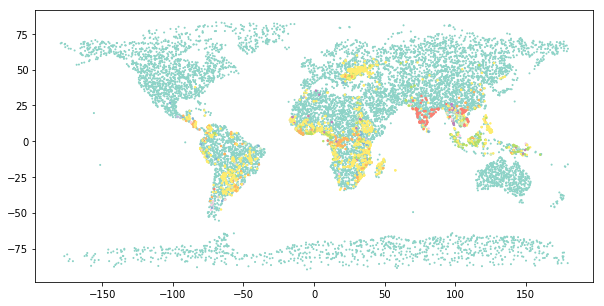

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(S_long, S_lat, s=1, c=S_colors)
plt.scatter(LMLF.long, LMLF.lat, c=LM_colors, s=2)

In [115]:
# Determine Features per lat/long
A_lat  = np.array(list(S_lat)  + list(LMLF.lat.values))
A_long = np.array(list(S_long) + list(LMLF.long.values))
features = np.array([GLCF.lookup(float(lat), float(long), pixel_window=10) for (lat, long) in zip(A_lat, A_long)])

positive_labels = np.array([ 0 ] * len(S_lat) + [ 1 ] * len(LMLF.lat))

In [25]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import MeanShift

pca  = PCA(n_components=2)
tsne = TSNE(n_components=2)

pca_features  = pca.fit_transform(features)
tsne_features = tsne.fit_transform(features)

clustering_labels = MeanShift(bandwidth=10).fit(tsne_features).labels_

In [32]:
def select_negative_clusters(cluster_labels, positive_labels, threshold=.95):
    """
    Select negative clusters based on some clustering of the TSNE space
    Inputs:
        cluster_labels:  np.array: labels from the clustering
        positive_labels: np.array: labels with true positives (0 is unknown/negative, 1 is true positive)
        threshold:       The % of negative samples per cluster that are required to call it negative (default 0.95)
                         (i.e. 0.05 positive)
    Outputs:
        a list of cluster label IDs that constitute negative clusters
    """
    clusters = list(range(max(cluster_labels)+1))
    neg_clusters = []
    for clust in clusters:
        clust_positive = positive_labels[np.where(cluster_labels == clust)]
        if (sum(clust_positive) / float(len(clust_positive))) < (1-threshold):
            neg_clusters.append(clust)
        #fi
    #efor
    return neg_clusters
#edef

def select_negative_points(cluster_labels, positive_labels, threshold=0.95):
    """
    Select negative clusters based on some clustering of the TSNE space
    Inputs:
        cluster_labels:  np.array: labels from the clustering
        positive_labels: np.array: labels with true positives (0 is unknown/negative, 1 is true positive)
        threshold:       The % of negative samples per cluster that are required to call it negative (default 0.95)
                         (i.e. 0.05 positive)
    Outputs:
        An array of negative (0) and positive (1) labels
    """
    negative_clusters = select_negative_clusters(clustering_labels, positive_labels, threshold)
    labels = np.array([ 1 ] * len(cluster_labels))
    for nc in negative_clusters:
        labels[np.where(cluster_labels == nc)] = 0
    #efor
    # Correct the true positive points we had which lie in negative clusters
    labels[np.where(positive_labels == 1)] = 1
    return labels
#edef
    

negative_labels = select_negative_points(clustering_labels, true_labels, .95)

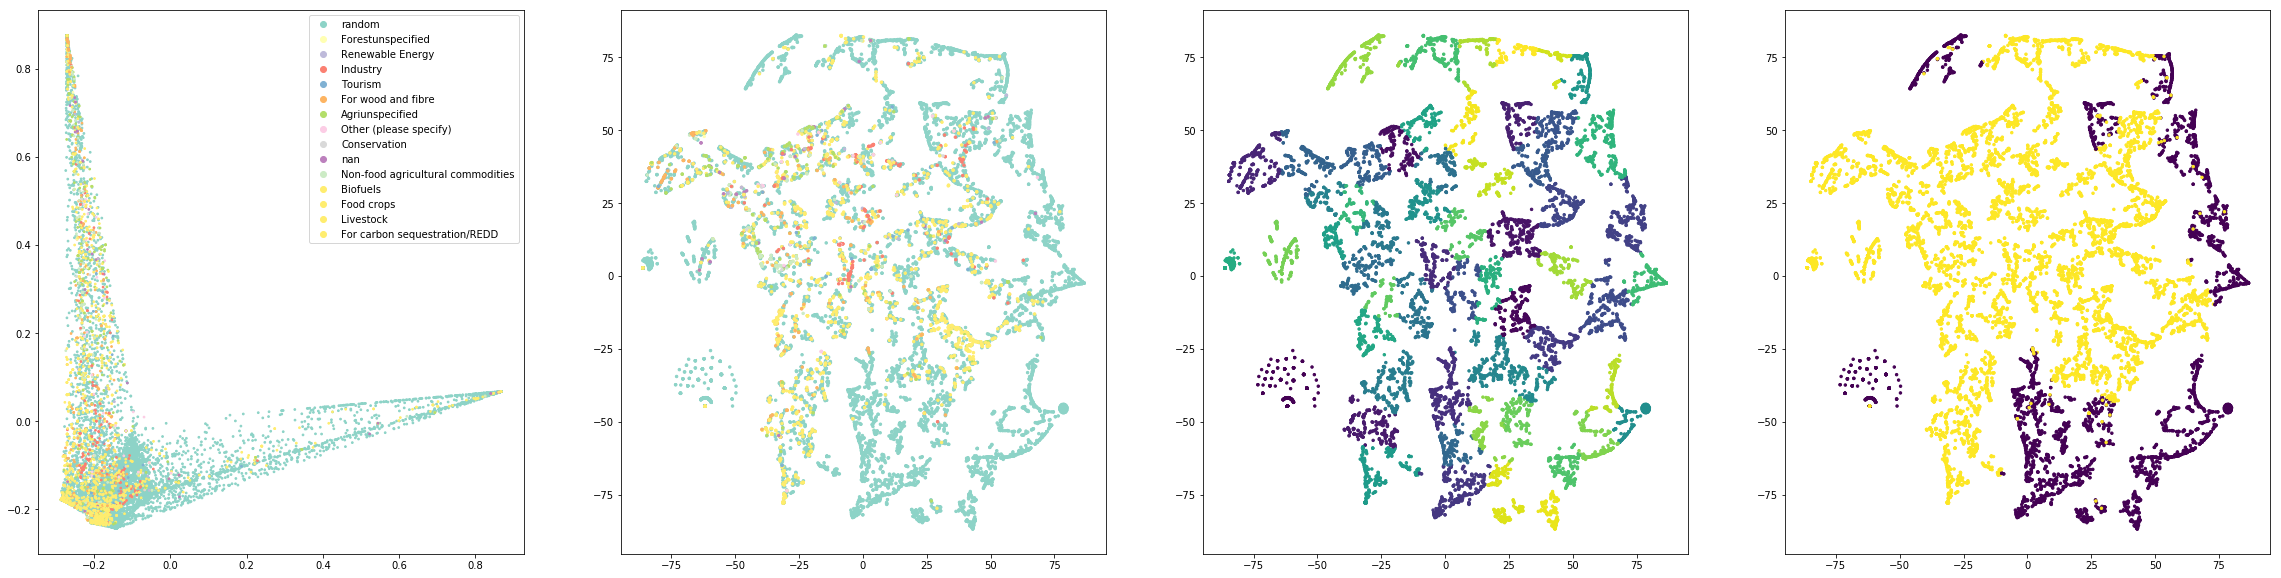

In [33]:
import matplotlib.lines as mlines

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(40, 10))
intention_legends = [ mlines.Line2D([], [],
                                    color=cmap(intention_label[i]),
                                    marker='o',
                                    linewidth=0,
                                    markersize=6,
                                    label=i)
                      for i in intention_label ]

axes[0].scatter(*zip(*pca_features), c=colors, s=3)
axes[0].legend(handles=intention_legends)

axes[1].scatter(*zip(*tsne_features), c=colors, s=6)
axes[2].scatter(*zip(*tsne_features), c=clustering_labels, s=6)
axes[3].scatter(*zip(*tsne_features), c=negative_labels, s=6)


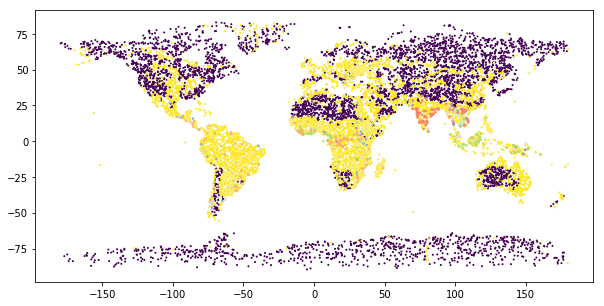

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(S_long, S_lat, s=1, c=negative_labels[:len(S_long)])
plt.scatter(LMLF.long, LMLF.lat, c=LM_colors, s=2)

In [29]:
true_negative_labels[np.where(true_negative_labels == 0)].shape

(4778,)

In [30]:
from sklearn.linear_model import LogisticRegression

In [119]:
sel_lat      = np.concatenate([A_lat[np.where(positive_labels == 1)[0]],
                               A_lat[np.where(negative_labels == 0)[0]]])
sel_long     = np.concatenate([A_long[np.where(positive_labels == 1)[0]],
                               A_long[np.where(negative_labels == 0)[0]]])
sel_features = np.concatenate([features[np.where(positive_labels == 1)[0],:],
                               features[np.where(negative_labels == 0)[0],:]])
sel_labels   = np.array([1] * features[np.where(positive_labels == 1)[0],:].shape[0] +
                        [0] * features[np.where(negative_labels == 0)[0],:].shape[0])

In [193]:
LR = LogisticRegression()
LRFit = LR.fit(X=sel_features, y=sel_labels)
LRproba = LRFit.predict_proba(sel_features)
sel_pred_labels = 1 * (LRproba[:,1] > 0.5)

/Users/thiesgehrmann/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [462]:
pd.DataFrame(sel_features[:,:14], columns=GLCF.labels).to_pickle('data/initial_features.pkl')
pd.DataFrame.from_dict({'label':sel_labels}).to_pickle('data/initial_labels.pkl')

Text(0.5, 0, 'P(y = 1)')

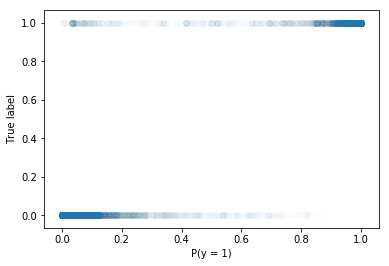

In [208]:
plt.scatter(LRproba[:,1], sel_labels, alpha=0.01)
plt.ylabel('True label')
plt.xlabel('P(y = 1)')

In [194]:
S_features = np.array([GLCF.lookup(float(lat), float(long), pixel_window=10) for (lat, long) in zip(S_lat, S_long)])
S_pred_proba = LRFit.predict_proba(S_features)[:,1]

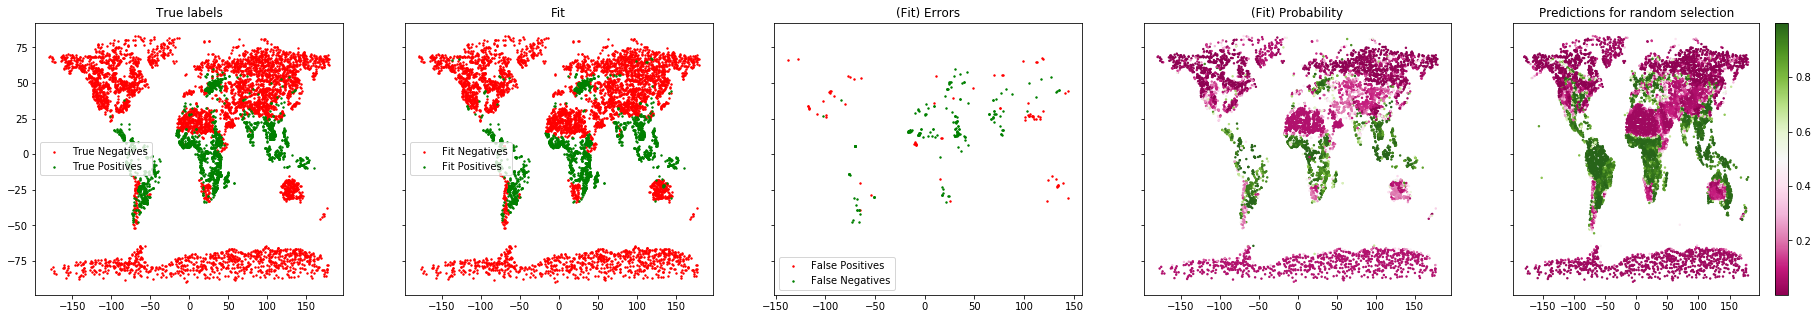

In [210]:
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(32,5), sharey=True)

axes[0].set_title('True labels')
axes[0].scatter(sel_long[np.where(sel_labels == 0)],
                sel_lat[np.where(sel_labels == 0)], c='r', s=2, label='True Negatives')
axes[0].scatter(sel_long[np.where(sel_labels == 1)],
                sel_lat[np.where(sel_labels == 1)], c='g', s=2, label='True Positives')
axes[0].legend()

axes[1].set_title('Fit')
axes[1].scatter(sel_long[np.where(LRproba[:,1] <= 0.5)],
                sel_lat[np.where(LRproba[:,1] <= 0.5)], c='r', s=2, label='Fit Negatives')
axes[1].scatter(sel_long[np.where(LRproba[:,1] > 0.5)],
                sel_lat[np.where(LRproba[:,1] > 0.5)], c='g', s=2, label='Fit Positives')
axes[1].legend()

axes[2].set_title('(Fit) Errors')
axes[2].scatter(sel_long[(sel_labels == 0) & (sel_pred_labels == 1)],
                sel_lat[(sel_labels == 0) & (sel_pred_labels == 1)],
                c='r', s=2, label='False Positives')
axes[2].scatter(sel_long[(sel_labels == 1) & (sel_pred_labels == 0)],
                sel_lat[(sel_labels == 1) & (sel_pred_labels == 0)],
                c='g', s=2, label='False Negatives' )
axes[2].legend()


axes[3].set_title('(Fit) Probability')
axes[3].scatter(sel_long[np.where(LRproba[:,1] <= 0.5)],
                sel_lat[np.where(LRproba[:,1] <= 0.5)],
                c=-LRproba[np.where(LRproba[:,1] <= 0.5),0][0], s=2,
                cmap=plt.get_cmap('PiYG'))
axes[3].scatter(sel_long[np.where(LRproba[:,1] > 0.5)],
                sel_lat[np.where(LRproba[:,1] > 0.5)],
                c=LRproba[np.where(LRproba[:,1] > 0.5),1][0], s=2,
                cmap=plt.get_cmap('PiYG') )

axes[4].set_title('Predictions for random selection')
sc = axes[4].scatter(S_long, S_lat, c=S_pred_proba, cmap=plt.get_cmap('PiYG'), s=2)
plt.colorbar(sc, ax=axes[4])


In [29]:
I_deals = LM.M.intention.apply(lambda x: [ y.strip() for y in (x.split(',') if isinstance(x,str) else [])]).values
I = { v:i for (i,v) in enumerate(sorted(set([i for d in I_deals for i in d]))) }

In [92]:
import numpy as np
O = np.zeros((len(I),len(I)))
E = np.zeros((len(I),len(I)))
for d in I_deals:
    for i,i_i in enumerate(d):
        for j, i_j in list(enumerate(d))[i:]:
            O[I[i_j],I[i_i]] += 1
            if i_i != i_j: # Don't count diagonal twice...
                O[I[i_i],I[i_j]] += 1
            #fi
        #efor
    #efor
#efor

total = np.sum(O)#np.sum(O[np.eye(len(I)) == 1])
for i in range(O.shape[0]):
    pct_i = O[i,i] / total
    for j in range(C.shape[1]):
        pct_j = O[j,j] / total
        E[i,j] = total * pct_i * pct_j
    #efor
#efor
    

O = pd.DataFrame(O, index=I.keys(), columns=I.keys())
E = pd.DataFrame(E, index=I.keys(), columns=I.keys())


/Users/thiesgehrmann/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/thiesgehrmann/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


Text(0.5, 1.0, 'Expected')

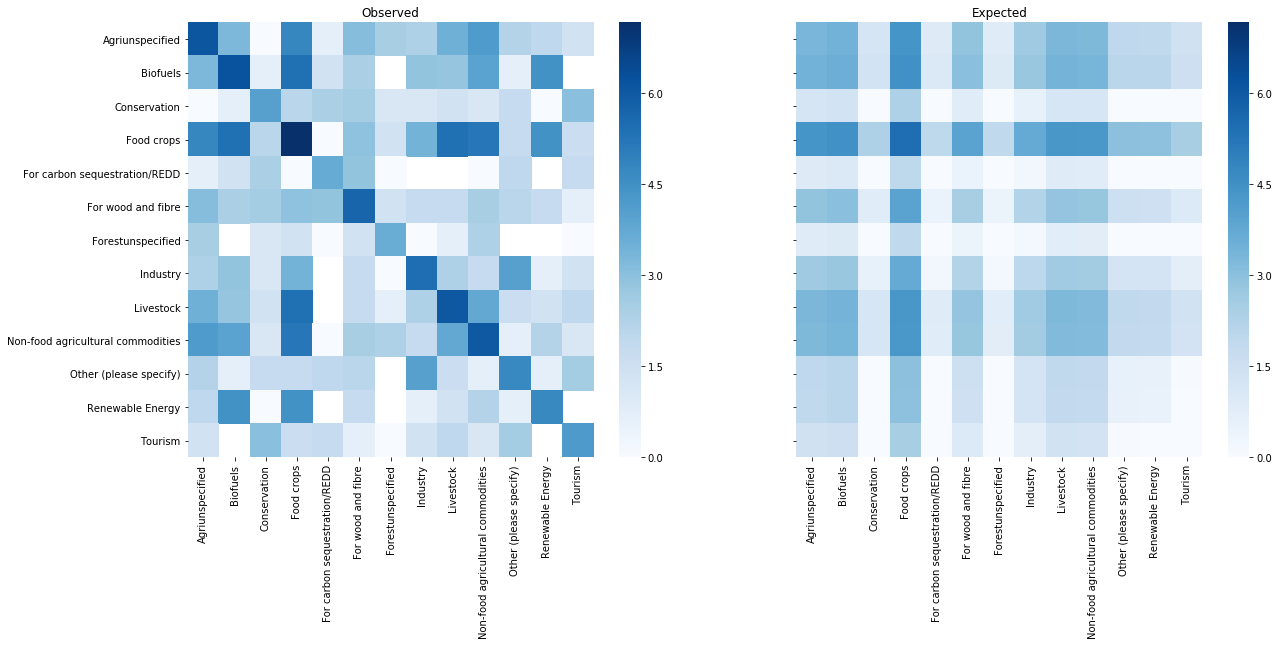

In [94]:
import matplotlib.pylab as plt
import seaborn as sns
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,8), sharey=True)
sns.heatmap(np.log(O), vmin=0, vmax=np.max(np.log(O.values)), ax=axes[0], cmap='Blues')
axes[0].set_title('Observed')
#plt.colorbar(cb, ax=axes[0])
sns.heatmap(np.log(E), vmin=0, vmax=np.max(np.log(O.values)), ax=axes[1], cmap='Blues')
axes[1].set_title('Expected')
#plt.colorbar(cb, ax=axes[1])

In [102]:
X2 = np.sum([(o - e)**2 / e for o,e in zip(O.values.flatten(), E.values.flatten())])

95801.08087904207

In [104]:
from scipy.stats import chi2
X2 = np.sum([(o - e)**2 / e for o,e in zip(O.values.flatten(), E.values.flatten())])
1-chi2.cdf(X2, df=total)

0.0

In [98]:
total

7275.0

In [100]:
O.values.flatten()

array([4.500e+02, 2.600e+01, 1.000e+00, 1.230e+02, 2.000e+00, 2.200e+01,
       1.200e+01, 1.000e+01, 3.400e+01, 6.600e+01, 9.000e+00, 7.000e+00,
       4.000e+00, 2.600e+01, 5.080e+02, 2.000e+00, 2.170e+02, 4.000e+00,
       1.100e+01, 0.000e+00, 1.800e+01, 1.700e+01, 5.300e+01, 2.000e+00,
       8.800e+01, 0.000e+00, 1.000e+00, 2.000e+00, 5.600e+01, 8.000e+00,
       1.100e+01, 1.300e+01, 3.000e+00, 3.000e+00, 4.000e+00, 3.000e+00,
       6.000e+00, 1.000e+00, 2.100e+01, 1.230e+02, 2.170e+02, 8.000e+00,
       1.293e+03, 1.000e+00, 1.900e+01, 4.000e+00, 3.100e+01, 2.200e+02,
       1.840e+02, 6.000e+00, 8.600e+01, 5.000e+00, 2.000e+00, 4.000e+00,
       1.100e+01, 1.000e+00, 4.000e+01, 1.800e+01, 1.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 7.000e+00, 0.000e+00, 6.000e+00, 2.200e+01,
       1.100e+01, 1.300e+01, 1.900e+01, 1.800e+01, 2.950e+02, 4.000e+00,
       6.000e+00, 6.000e+00, 1.200e+01, 8.000e+00, 6.000e+00, 2.000e+00,
       1.200e+01, 0.000e+00, 3.000e+00, 4.000e+00, 